In [893]:
from collections import Counter
from tabulate import tabulate
import matplotlib.pyplot as plt

i_m = 0.053098482833127306
e = 0.005

i_m обрахували за допомоги тексту з першої лабараторної, воно збігається з теоретичним з лекції

In [894]:
alp = ['а','б','в','г','д','е','ж','з','и','й','к','л','м','н','о','п','р','с','т','у','ф','х','ц','ч','ш','щ','ъ','ы','ь','э','ю','я']

name_f = 'makeevskiyradnichok(((.txt'
keys = ["хз", "сво", "киев", "микки", "крейсермасква"]

def process_text(name):
    f = open(name, 'r', encoding='utf-8')
    text = f.read()
    f.close()
    text = text.lower()
    text = text.replace('ё', 'е')
    text_n = ""
    for l in text:
        if l in alp:
            text_n += l
        else:
           text_n += ''
    text_n =  " ".join(text_n.split())
    return text_n

a = process_text(name_f)

In [895]:
def code(text, key):
    code = ""
    for i in range(len(text)):
        x = alp.index(text[i])
        k = (alp.index(key[i % len(key)]))
        y = (x + k) % len(alp)
        code += alp[y]
    return code

def decode(text, key):
    code = ""
    for i in range(len(text)):
        x = alp.index(text[i])
        k = (alp.index(key[i % len(key)]))
        y = (x - k) % len(alp)
        code += alp[y]
    return code


In [896]:
def affi(text):
    i = 0
    for j in Counter(text).values():
        i += j * (j - 1) 
    i = i / (len(text) * (len(text) - 1))
    return i

print(affi(a))

0.057478342981483764


╒════════════════════════════╤══════════════════╕
│   Number of letters in key │   Affinity index │
╞════════════════════════════╪══════════════════╡
│                          2 │        0.0428232 │
├────────────────────────────┼──────────────────┤
│                          3 │        0.0377929 │
├────────────────────────────┼──────────────────┤
│                          4 │        0.0423323 │
├────────────────────────────┼──────────────────┤
│                          5 │        0.0433694 │
├────────────────────────────┼──────────────────┤
│                         13 │        0.0333946 │
╘════════════════════════════╧══════════════════╛


<BarContainer object of 5 artists>

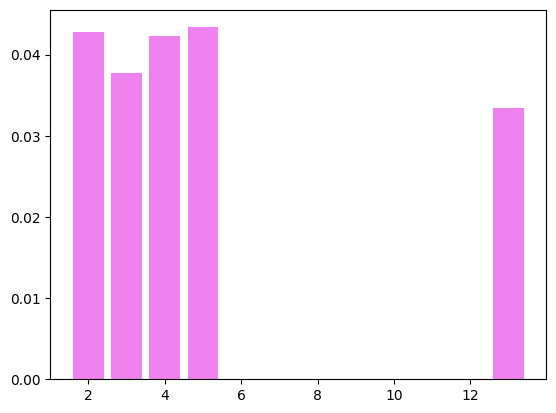

In [897]:
data1 = []
col_names1 = ["Number of letters in key", "Affinity index"]
af1 = []
val1 = []

for i in range(len(keys)):
    af1.append(affi(code(a, keys[i])))
    val1.append(len(keys[i]))
    data1.append([len(keys[i]), af1[i]])
    
print(tabulate(data1, headers=col_names1, tablefmt="fancy_grid"))
plt.bar(val1, af1, color ='violet')

In [898]:
data2 = []
val2 = []

text = process_text('text.txt')

def search(text):
    res = []
    arr = []
    for r in range(2, len(alp)):
        #val2.append(r)
        s = 0
        block = ""
        for i in range(r):
            for j in range(i, len(text), r):
                block += text[j]   
            s += affi(block)
            block = ""
        arr.append(s/r)
        #data2.append([val2[r-2], arr[r-2]])
    arr1 = [abs(i_m - x) for x in arr]
    for k in arr1:
        if k < e:
            res.append(arr1.index(k) + 2)
    #print(tabulate(data2, headers=col_names1, tablefmt="fancy_grid"))
    #plt.bar(val2, arr, color ='violet')
    return res

k_l = search(text)
print(k_l)

[15, 30]


In [899]:
def decypher(text, r):
    y = []
    k = []
    key = ""
    x = alp.index('о')
    block = ""
    for i in range(r):
            for j in range(i, len(text), r):
                block += text[j]
            y.append(Counter(block).most_common(1)[0][0])
            block = ""
            for i in y:
                k.append((alp.index(i) - x) % len(alp))
            for j in k:
                key += alp[j]
            k.clear()
            y.clear()
    return key

k = decypher(text, k_l[0])
print(k)
decode(text, k)


арудазевархимаг


'прошлошятнадцатьднейиътарыйдомпостепонноначаложиватесороклетвнемниутонежилпонастоищемузаэтовремячнсменилодиннадяатьхозяевноникыоизнихневыдержсвалвподобноммеътебольшетрехмеъяцевкреоливанеъсасталидвенадцйтымимагполностеюпогрузилсявракотуонотрывалсяыолькозатемчтобдпоестьаотснаизкавлялсязаклятиомбессонницынодфякреолаэтоявноцепроходилобезнйказанноглазауногопокраснелиавокинабряклииотвссливанессавсячоскистараласьубодитьеговтомчтоомуследуетпрекрйтитьиздевательътванадорганизмчмихотьразоквысшатьсяпонастоящомуномагтолькоомрызалсязанималъяондвумяделамицеутомимописалмйгическуюкнигуичкутывалособнякхагическойзащитчйитоидругоетрековалоуймывремециакреолникакнехогрешитьчтодляцегоболеесрочношоэтомузанималсиобоимиделамипошеременносначалйонвсерьезбеспоуоилсяотомчтозаогодушойвотвотялитсяужасныйтротнопотомутихомищилсярешивчтотоыскореевсегодажонезнаетовоскребениистаринноголрагапокрайнеймореванессаизбавсласьотдомашнихюлопотбраунихубортнеизменносохщаняяпостноевырйжениелицаубирафсяготовилиобстсрывалвсехжильцчво

Отримали дешифрований текст, але бачимо, що кожна 7-ма літера не та, тому ми механічно змінимо ключ. 
Рудазев -> Рудазов 

In [900]:
k = k[:6] + 'о' + k[7:]

decode(text, k)

'прошлопятнадцатьднейистарыйдомпостепенноначаложиватьсороклетвнемниктонежилпонастоящемузаэтовремяонсменилодиннадцатьхозяевнониктоизнихневыдерживалвподобномместебольшетрехмесяцевкреоливанессасталидвенадцатымимагполностьюпогрузилсявработуонотрывалсятолькозатемчтобыпоестьаотснаизбавлялсязаклятиембессонницынодлякреолаэтоявнонепроходилобезнаказанноглазаунегопокраснелиавекинабряклииотвисливанессавсяческистараласьубедитьеговтомчтоемуследуетпрекратитьиздевательстванадорганизмомихотьразоквыспатьсяпонастоящемуномагтолькоогрызалсязанималсяондвумяделаминеутомимописалмагическуюкнигуиокутывалособнякмагическойзащитойитоидругоетребовалоуймывремениакреолникакнемогрешитьчтодлянегоболеесрочнопоэтомузанималсяобоимиделамипопеременносначалаонвсерьезбеспокоилсяотомчтозаегодушойвотвотявитсяужасныйтройнопотомутихомирилсярешивчтототскореевсегодаженезнаетовоскрешениистаринноговрагапокрайнеймереванессаизбавиласьотдомашниххлопотбраунихубертнеизменносохраняяпостноевыражениелицаубиралсяготовилиобстирывалвсехжильцово

In [901]:
h = process_text('krasa_ruskava_yazika.txt') #великий текст з першої лаби
h1 =  Counter(h)

def m(text, r):
    block = ""
    m = []
    l = ""
    m_i = 0
    v = []
    for i in range(r):
        for j in range(i, len(text), r):
                block += text[j]
        c = Counter(block)
        c_k = sorted(Counter(block).keys())
        for g in alp:
            for t in alp:
                p = alp[(alp.index(t) + alp.index(g)) % len(alp)]
                if p not in c_k:
                    m_i += 0
                else:
                    m_i += (h1[t] / len(h)) * c[p]
            m.append(m_i) 
            m_i = 0
        v.append(m.index(max(m)))
        m.clear()
        block = ""
    for i in v: 
        l += alp[i]    
    return (l)

print(m(text, 15))

арудазовархимаг
